# ⭐AIFFEL 대전 1기 Exploration 11. 뉴스 요약봇 만들기 ⭐
>  프로젝트 소개: 뉴스 데이터를 가지고 요약문을 만들어 제목과 비교하자!

***

# 🎯 프로젝트 목표
   * 뉴스 데이터 전처리를 해보자
   * seq2seq 모델 설계를 해보자
   * 어텐션 메커니즘을 적용해 문장 요약을 해보자
   * 추출적 요약법을 실행해보자

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 데이터 수집하기
## 2. 데이터 전처리하기(추상적 요약)
- 2-1. 데이터 정리하기  
- 2-2. Train, Test data 나누기  
- 2-3. 정수 인코딩  

## 3. 어텐션 메커니즘 사용하기(추상적 요약)
- 3-1. seq2seq 모델 설계  
- 3-2. 어텐션 메커니즘 설계  
- 3-3. 모델 훈련하기  
- 3-4. 인퍼런스 모델 구현  

## 4. 실제 결과와 요약문 비교하기(추상적 요약)
## 5. Summa를 이용해서 추출적 요약해보기
## 6. 회고
- 6-1. 루브릭 평가  
- 6-2. 회고

***

# 0. 개념정리
## 1) 텍스트 요약  - 추출척 요약(Extractive Summarization)
- 원문에서 문장들을 추출해서 요약하는 방식  
- 예시로 10개의 문장으로 구성된 텍스트가 있다면, 그 중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식  
- 결과로 나온 문장들 간의 호응이 자연스럽지 않을 수 있다는 단점  

**예시: [네이버뉴스](https://news.naver.com/) 의 `요약봇`**

## 2) 텍스트 요약 - 추상적 요약(Abstractive Summarization)
- 원문으로부터 내용이 요약된 **새로운 문장을 생성**해내는 것  
- 원문에 없던 새로운 문장이 나올 수도 있다. (자연어 생성: NLG)    
- 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별 가능(이런 점에서 문장 분류 문제로 볼 수 있음)  
Q. **RNN은 학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어렵다는 문제**가 있다. 이 문제를 해결하기 위해 LSTM과 GRU가 등장했고, 이 둘도 부족해서 어텐션(Attention) 메커니즘이 등장.  
이 문제는? **장기 의존성 문제**  
  
seq2seq: 인코더와 디코더의 구조로 구성된 이 딥러닝 아키텍쳐  

## 3) seq2seq
- 원문을 첫번째 RNN인 **인코더**로 입력하면, 인코더는 이를 하나의 **고정된 벡터**로 변환(문맥 정보를 가지는 벡터; 컨텍스트 벡터)  
- 두번째 RNN인 **디코더**는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성  

#### LSTN과 컨벡스트 벡터
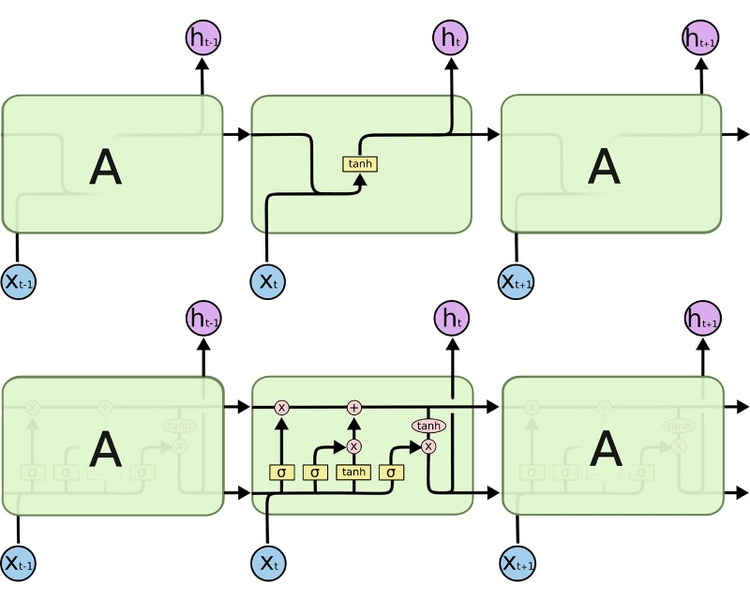
> 출처: http://colah.github.io/posts/2015-08-Understanding-LSTMs/  
- **LSTM**이 바닐라 RNN과 다른 점은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달  
- 즉, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state `h`와 cell state `c` 두 개의 값 모두 존재해야 한다는 뜻

## 4) 시작 토큰과 종료 토큰
- SOS 토큰: 디코더에 입력되면 각 시점마다 단어를 생성  
- EOS 토큰: 단어 생성 종료를 알려주는 토큰  
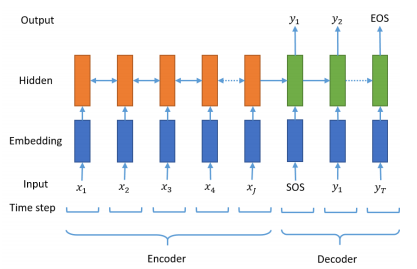
> 출처: https://arxiv.org/pdf/1812.02303.pdf  

## 5) 어텐션 메커니즘
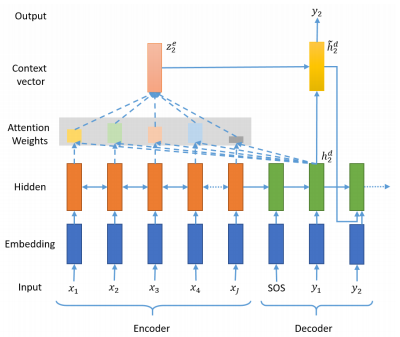
> 출처: https://arxiv.org/pdf/1812.02303.pdf  
- 기존의 seq2seq: **인코더의 마지막 time step의 hidden state**를 컨텍스트 벡터로 사용 (하지만 RNN 특성상 입력 시퀀스의 정보가 많이 소실된다)  
- **어텐션 메커니즘**은 **인코더의 모든 step의 hidden state의 정보**가 컨텍스트 벡터에 **전부** 반영되도록 한다!  
- 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식  
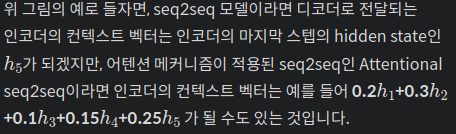  
- 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 **디코더의 현재 스텝이 어디냐에 따라 계속 달라진다는 점**  
- 즉, 디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것  

## 6) NLTK
- **Natural Language Toolkit의 축약어로 영어 기호, 통계, 자연어 처리를 위한 라이브러리**  
-  I, my, me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만, 의미를 분석하고 요약하는데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있다!  

***

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

[nltk_data] Downloading package stopwords to /home/aiffel-
[nltk_data]     dj40/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. 데이터 수집하기
[뉴스 기사 데이터](https://github.com/sunnysai12345/News_Summary)  
- newssummarymore.csv

In [ ]:
# import urllib.request
# urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
# data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [55]:
# 전처리 끝난 csv파일 불러오기

data = pd.read_csv('news_summary_more_after_preprocessing.csv', encoding='iso-8859-1')
data = data.drop(['Unnamed: 0'], axis=1)

### data 확인하기

In [3]:
data.sample(10)

,Summary,Text
28409,we are not movie actors or cricketers taxifors...,taxiforsure co founder raghunandan interview w...
94843,no plans to demonetise notes govt,minister state home kiren rijiju said rajya sa...
52391,touching girl breast is childhood stuff actor ...,talking actor dustin hoffman accused inappropr...
28963,rss organisation of nationalists it is not pak...,former president pranab mukherjee agreed atten...
3633,former judge who gave landmark emergency verdi...,retired justice chandrashekhar shankar dharmad...
94583,soldiers trapped in avalanches in batalik rescued,five soldiers trapped army post thursday snowf...
64355,mouni roy to star in ranbir alia brahm stra re...,according reports television actress mouni roy...
6795,payment service toss enters korea billion doll...,south korean payment services startup toss rai...
20812,maldives donates for kerala floods relief,island nation maldives sunday announced donati...
24378,yana volleyball player claims coach raped her ...,female volleyball player haryana accused coach...


In [ ]:
# data = data.rename({'headlines' : 'Summary', 'text' : 'Text'}, axis='columns')
# data.head(5)

***

# 2. 데이터 전처리하기 (추상적 요약)
- 텍스트 정규화  
- 불용어 제거

## 2-1. 데이터 정리하기

### 결측치 확인
- 결측치 없음

In [ ]:
# print(data.isnull().sum())

### 중복 확인
- 전체 개수 확인  
- 유니크 개수 확인  

In [ ]:
# # 전체 개수 확인
# print('Text 열의 전체 개수: ', data['Text'].shape[0])
# print('Summary 열의 전체 개수: ', data['Summary'].shape[0])

# # 유니크 개수 확인
# print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
# print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

# print('-------------------------------------------------------------------------')

# print('Text 열의 중복 개수: ', data['Text'].shape[0] - data['Text'].nunique())
# print('Summary 열의 중복 개수: ', data['Summary'].shape[0] - data['Summary'].nunique())

In [ ]:
# # 중복 제거 (139개 제거)
# print('전체 샘플수(중복 제거 전) :',(len(data)))
# data.drop_duplicates(subset = ['Text'], inplace = True)
# data.drop_duplicates(subset = ['Summary'], inplace = True)
# print('전체 샘플수 (중복 제거 후) :',(len(data)))

### 텍스트 정규화

In [ ]:
# # 텍스트 정규화와 불용어 제거

# contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
#                            "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
#                            "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
#                            "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
#                            "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
#                            "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
#                            "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
#                            "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
#                            "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
#                            "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
#                            "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
#                            "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
#                            "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
#                            "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
#                            "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
#                            "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
#                            "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
#                            "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
#                            "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
#                            "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
#                            "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
#                            "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
#                            "you're": "you are", "you've": "you have"}

# print("정규화 사전의 수: ",len(contractions))

### 불용어 제거

In [ ]:
# print('불용어 개수 :', len(stopwords.words('english') ))
# print(stopwords.words('english'))

In [ ]:
# # 불용어 제거, 요약에는 적용 안 함

# #데이터 전처리 함수
# def preprocess_sentence(sentence, remove_stopwords=True):
#     sentence = sentence.lower() # 텍스트 소문자화
#     sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
#     sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
#     sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
#     sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
#     sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
#     sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
#     sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
#     # 불용어 제거 (Text)
#     if remove_stopwords:
#         tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
#     # 불용어 미제거 (Summary)
#     else:
#         tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
#     return tokens

In [ ]:
# # 훈련 데이터 전체 전처리

# clean_text = []

# # 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
# for s in data['Text']:
#     clean_text.append(preprocess_sentence(s))

# # 전처리 후 출력
# clean_text[:5]

In [ ]:
# """
# 이제 Summary에 대해서 전처리 함수를 호출해줄 때는, 
# 불용어 제거를 수행하지 않는다는 의미에서 두번째 인자로 False를 넣어줄게요.
# """

# clean_summary = []

# # 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
# for s in data['Summary']:
#     clean_summary.append(preprocess_sentence(s, False))

# clean_summary[:5]

In [ ]:
# """보다 쉽게 확인하기 위해 데이터들을 데이터프레임에 재저장할게요. 
# 그리고 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체해요.
# """

# data['Text'] = clean_text
# data['Summary'] = clean_summary

# # 빈 값을 Null 값으로 변환
# data.replace('', np.nan, inplace=True)

In [ ]:
# 결측치 없음
data.isnull().sum()

In [ ]:
# # 전처리 후 csv 파일 저장

# data.to_csv('news_summary_more_after_preprocessing.csv')

## 2-2. Train, Test data 나누기

### Text, Summary 분포 시각화
- 치우진 모양 아님

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10029309397326
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299444342675704


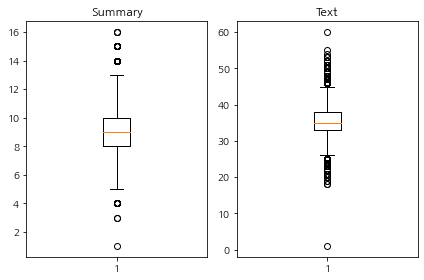

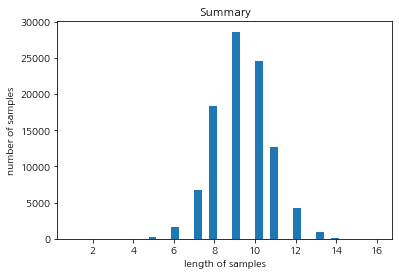

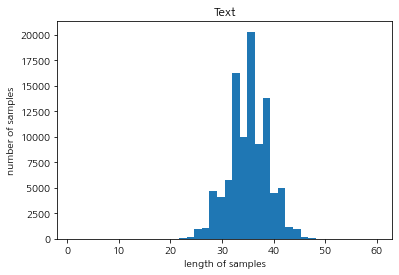

In [4]:
# 샘플 최대 길이 정하기

# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [5]:
text_max_len = 35
summary_max_len = 9

In [6]:
# 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수를 만들어서 좀 더 정확하게 판단해볼게요.
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [7]:
# 적용
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 35 이하인 샘플의 비율: 0.5411145712482954
전체 샘플 중 길이가 9 이하인 샘플의 비율: 0.5666585251674096


In [8]:
# 정해진 길이에 맞춰 자르는 것이 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제

data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 29589


### 시작 토큰, 종료 토큰 추가

In [9]:
# 시작 토큰과 종료 토큰 추가
# 시작 토큰은 'sostoken', 종료 토큰은 'eostoken'이라 임의로 명명
#요약 데이터에 시작 토큰과 종료 토큰을 추가한다.

data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Summary,Text,decoder_input,decoder_target
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
10,up cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...
18,how long can tolerate congress leaders potshot...,days threatened step post congress mlas contin...,sostoken how long can tolerate congress leader...,how long can tolerate congress leaders potshot...
20,think the opposition even dreams about me pm modi,claiming dearth ideas among opposition parties...,sostoken think the opposition even dreams abou...,think the opposition even dreams about me pm m...
22,killed injured in saudi arabia floods,least people killed others injured saudi arabi...,sostoken killed injured in saudi arabia floods,killed injured in saudi arabia floods eostoken


In [10]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장

encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [11]:
encoder_input_ = np.array(data['Text']) # 컬럼 하나를 선택해 Series를 ndarray로 표현
encoder_input_

array(['aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental death benefit rider life cover age years',
       'two minor cousins uttar pradesh gorakhpur allegedly repeatedly burnt tongs forced eat human excreta family friends two boys school cousins revealed ordeal police child welfare committee brought back gorakhpur nepal fled escape torture',
       'days threatened step post congress mlas continue crossing line karnataka chief minister hd kumaraswamy accused taking potshots asked many days tolerate stuff kumaraswamy made statements congress mla demanded siddaramaiah made cm said power ephemeral',
       ...,
       'one person arrested connection murder irish woman found dead near beach goa canacona region body woman reportedly found naked tuesday morning police irish embassy said contact indian authorities regarding case',
       'los angeles 

In [12]:
# 직접 코딩을 통해서 분리

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[23650 16580  2849 ... 18095 16025 27304]


In [13]:
# 섞기 전
encoder_input

array(['aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental death benefit rider life cover age years',
       'two minor cousins uttar pradesh gorakhpur allegedly repeatedly burnt tongs forced eat human excreta family friends two boys school cousins revealed ordeal police child welfare committee brought back gorakhpur nepal fled escape torture',
       'days threatened step post congress mlas continue crossing line karnataka chief minister hd kumaraswamy accused taking potshots asked many days tolerate stuff kumaraswamy made statements congress mla demanded siddaramaiah made cm said power ephemeral',
       ...,
       'one person arrested connection murder irish woman found dead near beach goa canacona region body woman reportedly found naked tuesday morning police irish embassy said contact indian authorities regarding case',
       'los angeles 

In [14]:
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해주면 잘 섞인 샘플이 되겠죠.

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [15]:
# 섞은 후
encoder_input

array(['raveena tandon starrer shab released friday dark haunting film human emotions relationships love betrayal wrote hindustan times ndtv wrote shab courageous film stylish layered evocative koimoi wrote family entertainer film everyone would like watch rated',
       'bhuvneshwar singh youth wing leader group akhil bhartiya kshatriya mahasabha announced offer reward crore anyone burns deepika padukone alive ongoing padmavati row deepika know feels like burnt alive actress never know sacrifice queen added singh',
       'four people arrested indonesia allegedly selling babies instagram instagram account promoted platform family welfare offered counsel pregnant women account featured pictures babies faces blurred along details age location religion',
       ...,
       'actress rani mukerji father filmmaker ram mukerji passed away sunday morning age ram produced daughter rani hindi debut film raja ki aayegi baraat known directing films like hum hindustani leader cause death confirmed

In [16]:
# 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리해줄게요. 
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의

n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 5917


In [17]:
# 이렇게 정의한 테스트 데이터의 갯수를 이용해 전체 데이터를 양분

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 23672
훈련 레이블의 개수 : 23672
테스트 데이터의 개수 : 5917
테스트 레이블의 개수 : 5917


## 2-3. 정수 인코딩
- **Tokenizer().fit_on_texts()**: 문자 데이터를 입력받아서 리스트의 형태로 변환  

In [18]:
# 단어 집한 만들기 및 정수 인코딩
# 텍스트 -> 정수 (단어집합)
# 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들게요

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

# 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여
# 생성된 단어 집합은 src_tokenizer.word_index에 저장

- **Tokenizer().word_counts.items()**: 단어와 각 단어의 등장 빈도수가 저장(<class 'odict_items'>)  
- **Tokenizer().word_index**: 단어와 빈도수의 딕셔너리 

In [19]:
# 빈도수가 낮은 단어들은 훈련 데이터에서 제외
# 등장 빈도수가 7회 미만인 단어 확인
# src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장되어져 있는데, 
# 이를 통해서 통계적인 정보를 얻을 수 있어요.

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 39966
등장 빈도가 6번 이하인 희귀 단어의 수: 28646
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11320
단어 집합에서 희귀 단어의 비율: 71.67592453585547
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.730931426356326


파라미터 src_vocab = 2080  
from 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2080

In [21]:
# 등장 빈도가 6회 이하인 단어 집합의 크기 = 2080
src_vocab = 11000
src_tokenizer = Tokenizer(num_words = src_vocab) # 단어 집합의 크기를 2080으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성.

**Tokenizer().texts_to_sequences()**: 정수 인코딩(단어 집합에 기반해 입력으로 주어진 텍스트 데이터의 단어들을 정수로 변환)  

In [22]:
# texts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

#잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[5024, 5354, 265, 99, 43, 3086, 9, 362, 5901, 3695, 440, 84, 1472, 151, 3143, 84, 9, 7624, 9639, 5690, 84, 101, 7625, 9, 1290, 35, 63, 1051, 1291], [5355, 69, 935, 2511, 137, 88, 8501, 8502, 64, 853, 2550, 12, 876, 4064, 674, 1088, 2551, 743, 1825, 1849, 674, 392, 2349, 63, 3463, 2551, 57, 299, 392, 8035, 1146, 2, 69], [87, 6, 49, 1530, 40, 936, 3026, 389, 389, 427, 3970, 514, 101, 1562, 544, 8036, 1598, 54, 427, 1041, 593, 3026, 2512, 290, 867, 322, 1850, 1826]]


In [23]:
# Summary 데이터에 대해서도 동일한 작업을 수행
# 케라스의 토크나이저를 사용하여 decoder_input_train을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수를 계산

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [24]:
# 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여
# tar_tokenizer.word_index에 저장
# tar_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장되어져 있는데, 
# 이를 통해서 통계적인 정보를 얻어서, 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18928
등장 빈도가 5번 이하인 희귀 단어의 수: 13855
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5073
단어 집합에서 희귀 단어의 비율: 73.1984361792054
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.803738827120123


파라미터 tar_vocab = 554  
from 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 554

In [25]:
tar_vocab = 5000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

#잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 2700, 3658, 106, 91, 18, 203], [1, 397, 391, 17, 5, 2701, 236, 1538], [1, 38, 3, 645, 5, 646, 2231, 7, 468], [1, 1620, 94, 4013, 419, 137, 1280, 1281, 420], [1, 48, 329, 2537, 3, 1621, 3, 153]]
target
decoder  [[2700, 3658, 106, 91, 18, 203, 2], [397, 391, 17, 5, 2701, 236, 1538, 2], [38, 3, 645, 5, 646, 2231, 7, 468, 2], [1620, 94, 4013, 419, 137, 1280, 1281, 420, 2], [48, 329, 2537, 3, 1621, 3, 153, 2]]


In [26]:
# decoder_input_train과 decoder_target_train에는 더 이상 숫자 2,000이 넘는 숫자들은 존재하지 않는다.
# 평균 길이가 4밖에 되지 않았던 요약문(Summary)의 경우 빈 샘플 많을 가능성 높다.
# 요약문에서 길이가 0이 된 샘플들의 인덱스 받아오기
# 토큰으로 인해 실제 길이가 0인 샘플은 길이가 1로 나올 것

# 훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장해볼게요. 이 샘플들은 모두 삭제

drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 1
훈련 데이터의 개수 : 23672
훈련 레이블의 개수 : 23672
테스트 데이터의 개수 : 5916
테스트 레이블의 개수 : 5916


/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**패딩**

In [27]:
# 패딩
# 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰줄게요.

encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

***

# 3. 어텐션 메커니즘 사용하기 (추상적 요약)

일반적인 seq2seq보다는 어텐션 메커니즘을 사용한 seq2seq를 사용하는 것이 더 나은 성능을 얻을 수 있어요. 실습 내용을 참고하여 어텐션 메커니즘을 사용한 seq2seq를 설계해 보세요.

## 3-1. seq2seq  모델 설계

In [28]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층 
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [29]:
# 디코더 설계
# LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 함

decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [30]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 128)      1408000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 35, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

## 3-2. 어텐션 메커니즘 설계

In [31]:
# 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 배워볼게요

urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py",
                           filename="attention.py")
from attention import AttentionLayer

In [32]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 128)      1408000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 35, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## 3-3. 모델 훈련하기

In [33]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
93/93 [==============================] - 25s 265ms/step - loss: 6.1589 - val_loss: 5.7766
Epoch 2/50
93/93 [==============================] - 24s 257ms/step - loss: 5.6999 - val_loss: 5.4696
Epoch 3/50
93/93 [==============================] - 24s 256ms/step - loss: 5.4735 - val_loss: 5.3474
Epoch 4/50
93/93 [==============================] - 25s 265ms/step - loss: 5.3268 - val_loss: 5.2564
Epoch 5/50
93/93 [==============================] - 25s 264ms/step - loss: 5.1827 - val_loss: 5.1358
Epoch 6/50
93/93 [==============================] - 24s 259ms/step - loss: 5.0109 - val_loss: 5.0233
Epoch 7/50
93/93 [==============================] - 24s 260ms/step - loss: 4.8486 - val_loss: 4.9007
Epoch 8/50
93/93 [==============================] - 24s 259ms/step - loss: 4.7027 - val_loss: 4.8285
Epoch 9/50
93/93 [==============================] - 24s 258ms/step - loss: 4.5728 - val_loss: 4.7641
Epoch 10/50
93/93 [==============================] - 24s 263ms/step - loss: 4.4488 - val_lo

### loss 시각화

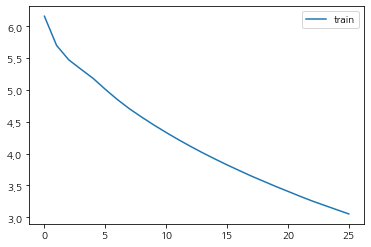

In [34]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

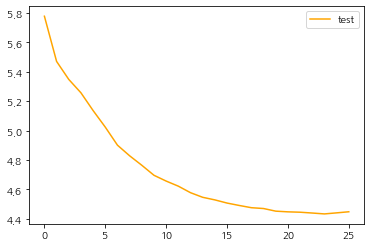

In [35]:
plt.plot(history.history['val_loss'], label='test', color='orange')
plt.legend()
plt.show()

## 3-4. 인퍼런스 모델 구현

In [36]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [37]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [38]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [39]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

***

# 4. 실제 결과와 요약문 비교하기(추상적 요약)
원래의 요약문(headlines 열)과 학습을 통해 얻은 추상적 요약의 결과를 비교해보세요.

### 모델 테스트하기

In [40]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [41]:
# 샘플 50개에 대한 결과
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : rani mukerji played role policewoman named shivaji roy film playing policewoman upcoming sequel rani character face cold villain fear god pure evil character written said rani 
실제 요약 : rani mukerji to play again in sequel 
예측 요약 :  am not the the film on completing yrs


원문 : income tax department seized crore kilograms gold silver jewellery raids conducted premises leading auto parts manufacturing company jay bharat maruti group department conducting searches since thursday around locations across delhi ncr linked group 
실제 요약 : crore seized during raids on bharat maruti group 
예측 요약 :  gold worth crore seized in mumbai airport


원문 : shelter home falsely claimed house girls found uttar pradesh inspection district magistrate monday night officials said many girls registered two girls living shelter home registered falsely shelter home owner draw aid officials added 
실제 요약 : shelter home with fake inmates found in up 
예측 요약 :  andhra cop suspended for violence on beef


원문 : relea

예측 요약 :  google to launch users in india report


원문 : one eight french women nearly lakh country female population raped least lifetime study jean revealed think tank women assess extent sexual harassment france study revealed sexually touched without consent 
실제 요약 : in french women has been raped study 
예측 요약 :  man who jailed for abusing sex


원문 : street food vendor gujarat introduced unlimited customers inspired reliance jio unlimited plans people unlimited day plan month plan vendor ravi also stall jio theme attract customers 
실제 요약 : gujarat inspired by jio introduces 
예측 요약 :  iit high of vodafone


원문 : former brazilian forward whose full name named american inventor thomas electricity introduced hometown born stated proud named initially sounded horrible 
실제 요약 : was named after american inventor 
예측 요약 :  player scores for the time in


원문 : former pakistani pacer shoaib akhtar wednesday revealed reason behind flying celebration saying wanted fighter pilot cricketer love je

***

# 5. Summa를 이용해서 추출적 요약해보기
- 추상적 요약은 추출적 요약과는 달리 문장의 표현력을 다양하게 가져갈 수 있지만, 추출적 요약에 비해서 난이도가 높다.  
- 추출적 요약은 추상적 요약에 비해 난이도가 낮고 기존 문장에서 문장을 꺼내오는 것이므로 잘못된 요약이 나올 가능성이 낮다.

In [43]:
import requests
from summa.summarizer import summarize

In [144]:
text = data['Text'][278]
print(len(text))
print(text)

243
suman kumari become first hindu woman appointed civil judge pakistan passing examination induction judicial officers kumari hails qambar shahdadkot serve native district opted challenging profession sure go places hard work honesty father said


### 기존 text + 마침표 + 임의 문장 1개

In [160]:
# text_: 추출적 요약이 적용되는 예시 문장
text_ = 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. \
Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

# 기존 문장인 text에 마침표와 임의의 문장 추가
text_new = text + '. This is a sample sentence.'
print(text_new)

suman kumari become first hindu woman appointed civil judge pakistan passing examination induction judicial officers kumari hails qambar shahdadkot serve native district opted challenging profession sure go places hard work honesty father said. This is a sample sentence.


In [159]:
print('Summary:')
print(summarize(text, ratio=0.8)) # 출력 X

print('Summary:')
print(summarize(text_, ratio=0.8)) # 출력되는 예시

print('Summary:')
print(summarize(text_new, ratio=0.8)) # 기존 문장 + 마침표 + 임의 문장 --> 출력 된다!!

Summary:

Summary:
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted.
Summary:
suman kumari become first hindu woman appointed civil judge pakistan passing examination induction judicial officers kumari hails qambar shahdadkot serve native district opted challenging profession sure go places hard work honesty father said.


# 6. 회고
## 6-1. 루브릭 평가
### 1. Abstractive 모델 구성을 위한 텍스트 전처리 단계가 체계적으로 진행되었다.  
- 전처리 과정을 완료  

### 2. 텍스트 요약모델이 성공적으로 학습되었음을 확인하였다.
- 텍스트 요약이 나름 잘 되었다.  

### 3. Extractive 요약을 시도해 보고 Abstractive 요약 결과과 함께 비교해 보았다.
- 추출적 요약과 추상적 요약의 비교  
- 추출적 요약의 경우 본 문장의 단순히 원문의 문장을 재구성했습니다.  
- 추상적 요약의 경우 본 문장을 재구성했기 때문에 본 문장에 없는 내용들이 출력되었다.

## 6-2. 회고
1) 자연어의 꽃! 어텐션에 대해 공부할 수 있었다. 중요한 부분에 집중하는(가중치를 부여) 방법에 대해 학습!
2) 또한 한 시계열 데이터에서 다른 시계열 데이터로 변환하는 seq2seq의 레이어를 쌓아볼 수 있었다.  
3) 추상적 요약과 추출적 요약에 대한 학습을 했는데, 추출적 요약은 단순한 기법인만큼 본 문장에서 추출했다. 추상적 요약의 경우 본 문장을 학습해 아예 새로운 문장을 구성해 다소 어색한 모습이 보였다.  
4) 파라미터(maxlen)을 변경하면서 변화하는 모습을 확인할 수 있었다. 특히 인상적이었던 것은 데이터 분포의 중앙값인 text_max_len = 30, summary_max_len = 8을 사용했을의 결과이다.  
- 실제 요약 : will be during india pakistan match   
- 예측 요약 :  to to  
위와 같이 전치사만 나오는 불상사가 일어났다...  

5) 오류: 그리고 추출적 요약에서 자꾸 요약의 결과가 나오지 않았다. 원인을 파악하고자 길이를 조절했지만 역부족.  
- 해결: 입력 문장은 2개 이상이어야 하며 문장이 끝날 때 마침표가 들어가야 한다.  
6) 디코더, 인코더, 히든 스테이트, 기억 셀 등 어텐션과 seq2seq에 대한 공부를 할 수 있었던 노드였다. 
- 특히 밑바닥부터 배우는 딥러닝2에서 배운 내용이 나와 반가웠다.  
7) 항상 도움 주고 받는 7조 감사합니다.! 어느덧 마지막이네요... 또 만나요